<a href="https://colab.research.google.com/github/johanhoffman/DD2363-VT20/blob/timaslj_lab4/Lab-4/timaslj_lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 4: Function approximation**
**Timas Ljungdahl**

# **Abstract**

In this report, the L2 projection of a known function $f(x)$ onto an approximation subspace $V$ that is spanned by a set of basis functions is calculated. The projection onto $V$ is the best possible approximation of $f(x)$ in $V$.

#**About the code**

A short statement on who is the author of the file, and if the code is distributed under a certain license. 

In [0]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2019 Johan Hoffman (jhoffman@kth.se)

# This file is part of the course DD2363 Methods in Scientific Computing
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

To have access to the neccessary modules you have to run this cell. If you need additional modules, this is where you add them. 

In [0]:
# Load neccessary modules.
from google.colab import files

import time
import numpy as np
import unittest
import random
import math

from sympy import * 

from matplotlib import pyplot as plt
from matplotlib import tri
from matplotlib import axes
from mpl_toolkits.mplot3d import Axes3D

# **Introduction**

We begin to define a function space $V$ that is spanned by a set of basis functions $\phi_0, ..., \phi_N$, $V = span\{\phi_0, ..., \phi_N\}$, such that any function $u \in V$ can be written as a linear combination of these basis functions:

$$
u = \sum_{j \in I_s}{c_j\phi_j}
$$

We want to minimize the distance $e$ between an approximation $u$ and function $f$, i.e find the best approximation $u(x)\in V$. In $V$ the inner product is defined as $(f,g) = \int_{a}^{b}{f(x)g(x)}$ on an interval $[a,b]$. $e$ is then defined as $(f(x)- \sum_{j \in I_s}{c_j\phi_j}, f(x)- \sum_{j \in I_s}{c_j\phi_j})^{1/2}$. Minimizing the norm is equivalent to $(e,v_i) = 0, i \in I_s$ which is the projection of $f$ onto the subspace $V$. 

We approximate $u$ by spliting up the domain into subdomains (elements) where each basis function is a locally defined pieacewise polynomial over a subdomain. For a linear approximation each basis function $\phi_i(x)$  is choosen to be a Lagrange polynomial of degree 1 that is 1 for $x_i$ and $0$ for all other elements.   

We end up with a linear system of a coefficient matrix $A_{i,j} = (\phi_i, \phi_j$) and a right-hand side vector $b_i = (f, \phi_i)$ where we want to solve for $c$ such that $Ac = b$.

In the linear case we can calculate $A$ with the following rules:
$A_{i,i-1}=A_{i,i+1}=h/6$ and $A_{i,i} = 2h/3$ where $h$ is the distance between the points which is constant. $b$ can be calculated as $b_i = f(x_i)*h/2$. In the code this is done by adding local matrix $A$ and vector $b$ to the global ones. The value $c_i$ in vector $c$ is intepreted as the approximate of $f(x_i)$ given by the following formula:

$$
u(x_{i}) = \sum_{j\in I_s} c_j \psi_j (x_{i}) =
\sum_{j\in I_s} c_j \phi_j (x_{i}) = c_i \phi_i (x_{i}) = c_i
$$

since $\phi_j = 0$ when $j$ != $i$ and $\phi_i = 1$.  

# **Methods**

The algorithm was implemented following the pseudo-code of **algorithm 9.2** provided in the lecture notes on page 171. To test the algorithm, the same function was approximated with a 1d mesh with decreasing intervals. The error was then calculated by taking the norm of the difference vector between the result vector consisting of ${f(x_i), x_i \in x}$ and $c$. For each iteration of approximation with a mesh with decreasing intervals, the norm of the difference vector was added to a list. When the iterations were finished, the list was plotted against the interval of that approximation. 

# **Results**

### **L2 Projection to pointwise linear approximation over mesh in 1D**

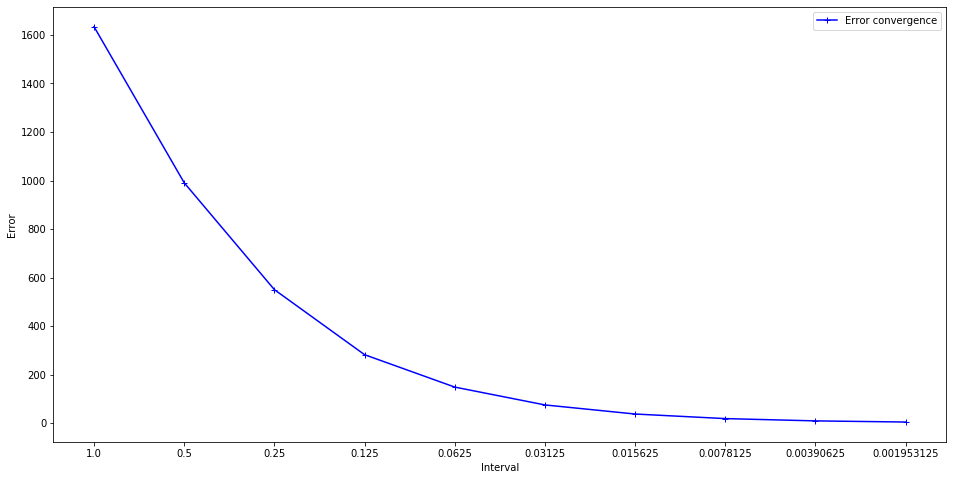

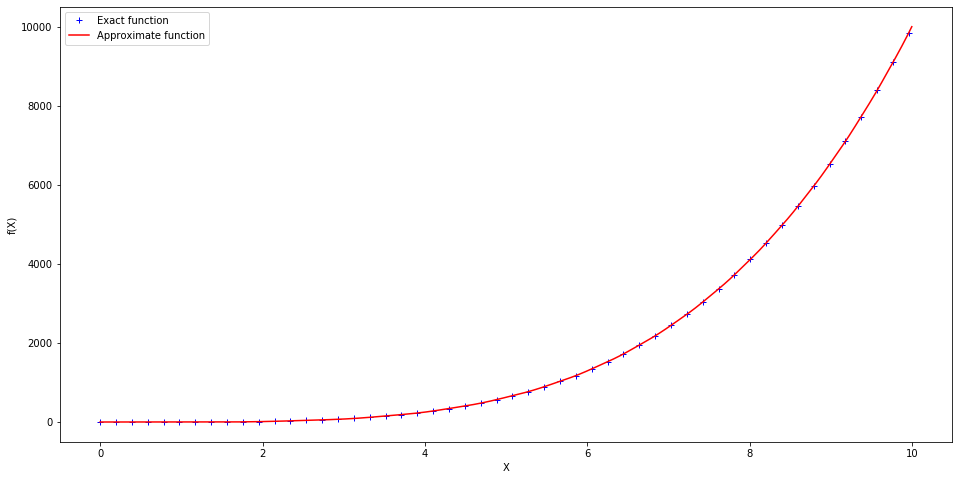

In [18]:
def l2_projection_linear_approx(f, x_mesh):
    elements = [[i,i+1] for i in range(len(x_mesh)-1)]
    b_glob = np.zeros(len(x_mesh))
    a_glob = np.zeros((len(x_mesh),len(x_mesh)))

    for k in range(len(elements)):
        h = x_mesh[elements[k][1]]-x_mesh[elements[k][0]]
        for i in range(len(elements[k])):
            b_glob[elements[k][i]] += f(x_mesh[elements[k][i]])*h/2
            for j in range(len(elements[k])):
                a_glob[elements[k][i],elements[k][j]] += h/3 if i==j else h/6
    
    return a_glob, b_glob

def f(x):
    return 3*math.cos(x**2) + x**4
    
intervals = [1/(2**x) for x in range(10)]
dif_vector = np.zeros(len(intervals))

for i in range(len(intervals)):
    x_mesh = np.arange(0,10,intervals[i])
    A,b = l2_projection_linear_approx(f, x_mesh)
    c = np.linalg.solve(A,b)
    res_vector = np.array([f(x) for x in x_mesh])

    dif_vector[i] = np.linalg.norm(res_vector-c)

# Plot the error convergence
plt.figure(figsize=(16,8))
plt.plot(dif_vector, "-b+", label="Error convergence")
plt.legend(loc="upper right")
plt.xlabel("Interval")
plt.ylabel("Error")
plt.xticks(np.arange(len(intervals)), intervals)

plt.figure(figsize=(16,8))
plt.plot(x_mesh[::100], res_vector[::100], "b+", label="Exact function")
plt.plot(x_mesh, c, "-r", label="Approximate function")
plt.legend(loc="upper left")
plt.xlabel("X")
plt.ylabel("f(X)")

plt.show()

# **Discussion**

We can clearly see that the error quickly converges to 0 when decreasing the interval quadratically. This shows that the approximate function $u(x)$ performs well in approximating $f(x)$ when using a mesh with suffiently small intervals. The results also show that the approximate function clearly overlaps the exact function, meaning that it very closely resembles the exact function. It could be interesting to test the algorithm for several functions. 